# (Dataset Exploration Title)
## by (Omar Shoura)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [104]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [162]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No


In [106]:
df.shape[0]

183412

In [149]:
# droping the null values
df.dropna(inplace=True)

In [150]:
# getting the members ages at 2019
df.member_birth_year=df.member_birth_year.astype('int64')
df['member_age']=2019-(pd.to_datetime(df['member_birth_year'],format='%Y').dt.year)

In [151]:
# getting the start time in datetime data type 
df.start_time=pd.to_datetime(df.start_time)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60


In [153]:
# creating  Month,Day of the week, hour new columns
df['start_month']=df.start_time.dt.strftime('%B')
df['start_day_of_week']=df.start_time.dt.strftime('%A')
df['start_hour']=df.start_time.dt.strftime('%H')

In [111]:
# check for duplicates
df.duplicated().sum()

0

In [112]:
df.shape[0]

174952

In [154]:
#getting the duration in min
df['duration_min']=(df['duration_sec']/60).astype('int64')

In [155]:
# Rearranging the columns in the dataframe and droping unuseful cols
cols_rearrange = ['bike_id', 'start_station_id', 'end_station_id', 'start_station_name', 'end_station_name', 'start_time', 'end_time','start_month','start_day_of_week','start_hour', 'duration_min',
                 'user_type', 'bike_share_for_all_trip','member_age' , 'member_gender']
df = df[cols_rearrange]

In [156]:
# saving the changes to a new csv file for easier analysis
df.to_csv('new_df.csv',index=False)

In [163]:
df=pd.read_csv('new_df.csv')
df.head()

,bike_id,start_station_id,end_station_id,start_station_name,end_station_name,start_time,end_time,start_month,start_day_of_week,start_hour,duration_min,user_type,bike_share_for_all_trip,member_age,member_gender
0,4902,21.0,13.0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,February,Thursday,17,869,Customer,No,35,Male
1,5905,86.0,3.0,Market St at Dolores St,Powell St BART Station (Market St at 4th St),2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,February,Thursday,12,1030,Customer,No,47,Male
2,6638,375.0,70.0,Grove St at Masonic Ave,Central Ave at Fell St,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,February,Thursday,17,608,Subscriber,No,30,Other
3,4898,7.0,222.0,Frank H Ogawa Plaza,10th Ave at E 15th St,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,February,Thursday,23,26,Subscriber,Yes,45,Male
4,5200,93.0,323.0,4th St at Mission Bay Blvd S,Broadway at Kearny,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,February,Thursday,23,29,Subscriber,No,60,Male


In [168]:
#this shows that all trips are in Feb
df.start_month.value_counts()

February    174952
Name: start_month, dtype: int64

### What is the structure of your dataset?

The data has 183412 rows and 174952 rows after droping the NaN values and 16 coloumns

### What is/are the main feature(s) of interest in your dataset?

The subscribers vs the customers, start and end sations , trips duration , age and sex for the customers

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

We have all features ready to explore after some edits

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

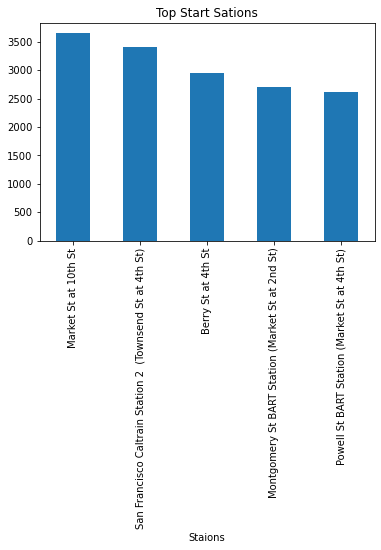

In [26]:
# getting the top start staions
tp_strt_st=df.start_station_name.value_counts()[:5]
tp_strt_st.plot(kind='bar')
plt.xlabel('Staions')
plt.title('Top Start Sations');

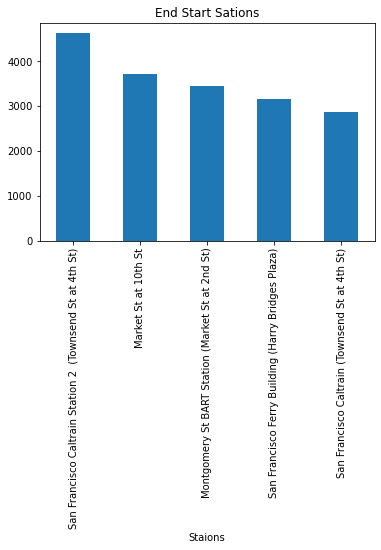

In [27]:
# getting the top start staions
tp_end_st=df.end_station_name.value_counts()[:5]
tp_end_st.plot(kind='bar')
plt.xlabel('Staions')
plt.title('End Start Sations');

Here we saw the top start and end stations the top two sations are the same in each case

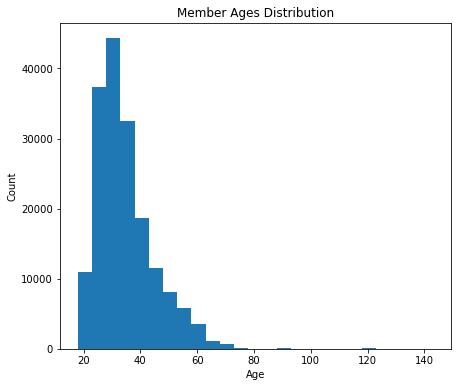

In [129]:
bins=np.arange(18,df.member_age.max()+5,5)
plt.figure(figsize=[7,6])
plt.hist(df.member_age,bins=bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Member Ages Distribution');

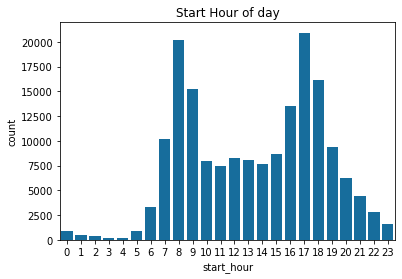

In [161]:
base_color=sb.color_palette('colorblind')[0]
sb.countplot(data=df,x='start_hour',color=base_color)
plt.title('Start Hour of day');

<Figure size 720x360 with 0 Axes>

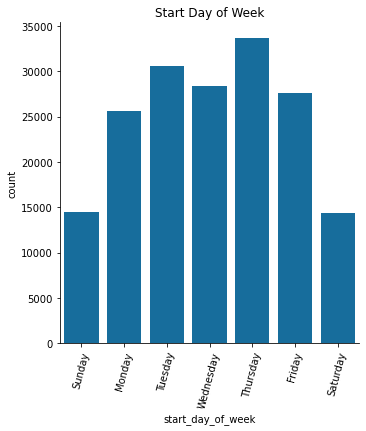

In [186]:
week_days=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=[10,5])
sb.catplot(data=df,x='start_day_of_week',order=week_days,kind='count',color=base_color)
plt.title('Start Day of Week')
plt.xticks(rotation=75);

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I used bar chart to visualize the top start and end stations by getting a series of the top 5 stations from the data set

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I performed some cleaning and tuning to get the users ages and remove the records with missing values also to get the trip duration in minutes instead of seconds and created new columns for start month,day of the week and hour. other than that the dataset in tidy

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

ValueError: x and y must be the same size

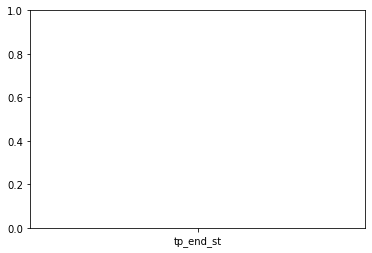

In [29]:
plt.scatter(data=df,x='tp_end_st',y='member_age');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!